In [92]:
import ReplayBuffer

In [93]:
import matplotlib.pyplot as plt
import matplotlib
import joblib
import os
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import seaborn as sns
import pandas as pd
%matplotlib inline

In [94]:
err_treshold = 10

In [95]:
cmap=plt.cm.jet
z_cmap = plt.cm.gnuplot2
# (.98, .22, 0.01),
colors = [(.98, .48, 0.01), (.98, 0.84, .01), (.61, 0.8, 0.), (0,1,0) ,(0,.76,1),(0,.18,1)]
n_map = LinearSegmentedColormap.from_list('nmap', colors, N=6)

In [96]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=err_treshold)
z_norm = matplotlib.colors.Normalize(vmin=0.25, vmax=0.6)
n_norm = matplotlib.colors.Normalize(vmin=1, vmax=6)

In [97]:
taget_points = np.loadtxt('../src/test_points.txt')
optim = pd.read_csv('../test_optim.csv',header=0)
optim['target_points'] = optim['test_nr'].apply(lambda x: taget_points[x])
optim['target_points'] = optim['test_nr'].apply(lambda x: taget_points[x])
optim['error_log'] = optim['error_log'].apply(lambda x: 1 if x == float('inf') else x)

In [98]:
optim

,test_nr,n_iter,target,error_log,landing_position,elapsed_time,target_points
0,0,250,[-0.77747 0.06276 0.25000],0.594629,[-0.31400 0.05496 0.01582],27.686979,"[-0.7774707003446839, 0.06276392359904591, 0.25]"
1,1,250,[-0.77747 0.06276 0.32000],0.565288,[-0.33916 0.09155 0.01494],28.042291,"[-0.7774707003446839, 0.06276392359904591, 0.32]"
2,2,250,[-0.77747 0.06276 0.39000],0.443611,[-0.45197 0.10640 0.01459],29.693459,"[-0.7774707003446839, 0.06276392359904591, 0.39]"
3,3,216,[-0.77747 0.06276 0.46000],0.399949,[-0.51996 0.08308 0.01596],25.809362,"[-0.7774707003446839, 0.06276392359904591, 0.4..."
4,4,243,[-0.77747 0.06276 0.53000],0.407186,[-0.57263 0.11060 0.01613],30.191042,"[-0.7774707003446839, 0.06276392359904591, 0.53]"
...,...,...,...,...,...,...,...
721,721,116,[ 0.78000 0.00000 0.32000],0.056533,[ 0.75520 0.03189 0.08811],15.063264,"[0.78, 9.552245033349355e-17, 0.32]"
722,722,77,[ 0.78000 0.00000 0.39000],0.064949,[ 0.73799 0.02392 0.15766],9.949288,"[0.78, 9.552245033349355e-17, 0.39]"
723,723,84,[ 0.78000 0.00000 0.46000],0.081493,[ 0.72172 0.02746 0.22350],11.476550,"[0.78, 9.552245033349355e-17, 0.45999999999999..."
724,724,75,[ 0.78000 0.00000 0.53000],0.081493,[ 0.72172 0.02746 0.22350],9.778651,"[0.78, 9.552245033349355e-17, 0.53]"


In [99]:
optim['elapsed_time'].mean()

13.993585515613399

In [100]:
tests = [12000,25000,50000,75000,100000,'optim','end2end']
tests_error = []

In [101]:
rb = joblib.load(
                f'../runs_joints/test/model_10800000/ReplayBuffer_test.joblib')

n_episode = rb.mem_size
com0_points = np.full((n_episode,3),[-0.01303,  0.00229,  0.25252])
target_points = rb.state[:n_episode][:, 9:12]
reached_points = rb.next_state[:n_episode][:, :3]
target_error = np.linalg.norm(target_points - reached_points, axis=1)
target_distance = np.linalg.norm(target_points-com0_points, axis=1)
perc_error = target_error/target_distance

/tmp/ipykernel_861130/3112063661.py:102: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


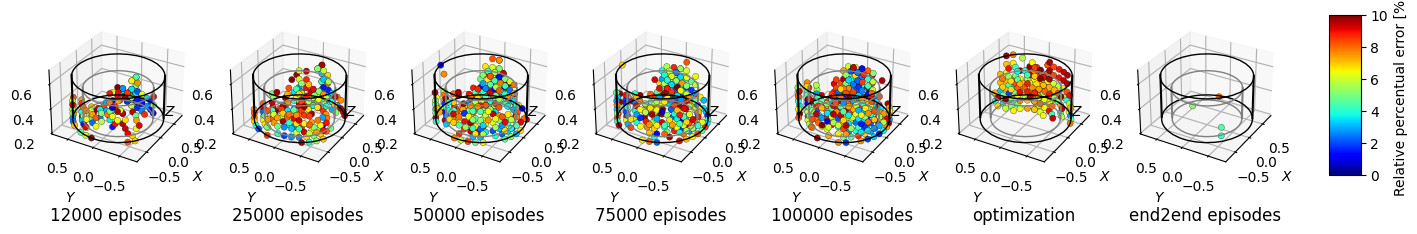

In [102]:
fig = plt.figure(figsize=plt.figaspect(1/len(tests)))
# fig = plt.figure(figsize=(10,10))

for i,test in enumerate(tests):
    if str(test).isnumeric():
        rb = joblib.load(
                f'../runs_256/test/model_{test}/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = rb.state[:n_episode][:, :3]
        target_points = rb.state[:n_episode][:, 3:]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance
    
    elif test == 'optim':
        target_points = np.array([target for target in optim['target_points'].values])
        perc_error = optim['error_log'].values.copy()

    elif test == 'end2end':
        rb = joblib.load(
                f'../runs_joints/test/model_10800000/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = np.full((n_episode,3),[-0.01303,  0.00229,  0.25252])
        target_points = rb.state[:n_episode][:, 9:12]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance
    

    perc_error*=100
    tests_error.append(perc_error)
    # Filter points with perc_error < err_treshold
    idx = perc_error <= err_treshold
    err_filter = perc_error[idx]
    feasible_region = target_points[idx, :]
    n_of_point = len(err_filter)


    ax = fig.add_subplot(1, len(tests), i+1, projection='3d')

    ax.margins(x=0,y=0,z=0)
    ax.set_xlim(-.79, .79)
    ax.set_ylim(-.79, .79)
    ax.set_zlim(0.2, .7)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_zlabel('$Z$')
    ax.view_init(azim=-150,elev=30)
    feasible_plot = ax.scatter(feasible_region[:, 0], feasible_region[:, 1], feasible_region[:, 2],
                                    c=err_filter, alpha=1, edgecolors="black", linewidths=0.2,
                                    cmap=cmap, norm=norm)

    # train 
    r = 0.6
    top = Circle( (0, 0),r, fill = False, color='grey')
    down = Circle( (0, 0),r, fill = False, color='grey')
    ax.add_patch(top)
    ax.add_patch(down)
    art3d.pathpatch_2d_to_3d(top, z=0.25, zdir="z")
    art3d.pathpatch_2d_to_3d(down, z=0.5, zdir="z")

    x0 = r * np.cos(-np.pi/2+0.5)
    y0 = r * np.sin(-np.pi/2+0.5)

    x1 = r * np.cos(np.pi/2+0.5)
    y1 = r * np.sin(np.pi/2+0.5)

    plt.plot([x0,x0],[y0,y0],[0.25,0.5], color='gray',zorder=2.5)
    plt.plot([x1,x1],[y1,y1],[0.25,0.5], color='gray',zorder=2.5)
    
    # test 
    r = 0.78
    top = Circle( (0, 0),r, fill = False, color='black')
    down = Circle( (0, 0),r, fill = False, color='black')
    ax.add_patch(top)
    ax.add_patch(down)
    art3d.pathpatch_2d_to_3d(top, z=0.25, zdir="z")
    art3d.pathpatch_2d_to_3d(down, z=0.6, zdir="z")

    x0 = r * np.cos(-np.pi/2+0.5)
    y0 = r * np.sin(-np.pi/2+0.5)

    x1 = r * np.cos(np.pi/2+0.5)
    y1 = r * np.sin(np.pi/2+0.5)

    plt.plot([x0,x0],[y0,y0],[0.25,0.6], color='black',zorder=2.5)
    plt.plot([x1,x1],[y1,y1],[0.25,0.6], color='black',zorder=2.5)
       
    if test != 'optim':
        ax.set_title( f'{test} episodes', y=.0, pad=-35)
    else:
        ax.set_title( 'optimization', y=.0, pad=-35)
    
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(feasible_plot, shrink=0.3, label='Relative percentual error [%]', cax=cbar_ax)
# fig.suptitle('Target positions with RPE $\leq$ 0.1')
fig.savefig(os.path.join('plots', f'feasible_filtered.pdf'), dpi=500, bbox_inches='tight')
fig.show()

/tmp/ipykernel_861130/4015289424.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


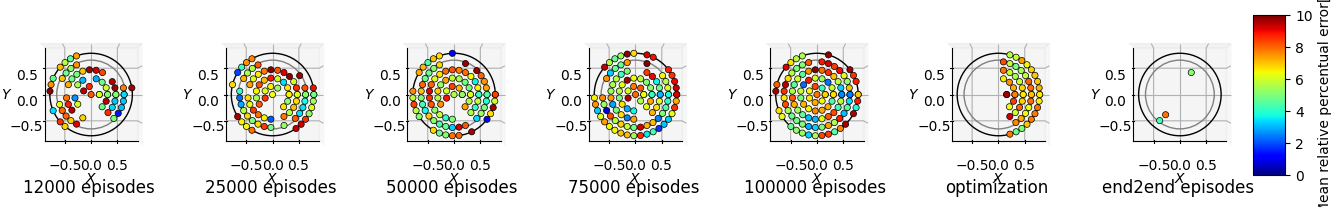

In [103]:
fig = plt.figure(figsize=plt.figaspect(1/len(tests)))

for i,test in enumerate(tests):
    if str(test).isnumeric():
        rb = joblib.load(
                f'../runs_256/test/model_{test}/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = rb.state[:n_episode][:, :3]
        target_points = rb.state[:n_episode][:, 3:]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance
    
    elif test == 'optim':
        target_points = np.array([target for target in optim['target_points'].values])
        perc_error = optim['error_log'].values.copy()

    elif test == 'end2end':
        rb = joblib.load(
                f'../runs_joints/test/model_10800000/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = np.full((n_episode,3),[-0.01303,  0.00229,  0.25252])
        target_points = rb.state[:n_episode][:, 9:12]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance
        
    perc_error*=100
    # Filter points with perc_error < err_treshold
    idx = perc_error <= err_treshold
    err_filter = perc_error[idx]
    feasible_region = target_points[idx, :]
    n_of_point = len(err_filter)    


    # generate surface
    xy_pair = []
    err = []

    for j,p in enumerate(feasible_region):
        # new point
        if [p[0],p[1]] not in xy_pair:
            xy_pair.append([p[0],p[1]])
            err.append([err_filter[j]])
        else:
            # x,y present, get if z > z in array
            idx = xy_pair.index([p[0],p[1]])
            err[idx].append(err_filter[j])

    mean_err = [np.mean(e) for e in err]
    surface = np.append(np.array(xy_pair),np.array(mean_err).reshape(-1,1),axis=1)

    ax = fig.add_subplot(1, len(tests), i+1, projection='3d',computed_zorder=False)
    train_area = Circle( (0, 0),0.65, fill = False, color='gray')
    test_area = Circle( (0, 0),0.78, fill = False, color='black')
    ax.add_patch(train_area)
    ax.add_patch(test_area)
    art3d.pathpatch_2d_to_3d(train_area, z=0, zdir="z")
    art3d.pathpatch_2d_to_3d(test_area, z=0, zdir="z")
    ax.margins(x=0,y=0,z=0)
    ax.set_xlim(-.85, .85)
    ax.set_ylim(-.85, .85)
    # ax.set_zlim(0, 0.1)
    ax.zaxis.line.set_lw(0.)
    ax.set_zticks([])
    ax.view_init(azim=-90,elev=90)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    if test != 'optim':
        ax.set_title( f'{test} episodes', y=.0, pad=-15)
    else:
        ax.set_title( 'optimization', y=.0, pad=-15)

    # surf_plot = ax.plot_trisurf(surface[:, 0], surface[:, 1], surface[:, 2], alpha=1, edgecolors="black", linewidths=0.2, cmap=cmap, norm=norm)
    surf_plot = ax.scatter(surface[:, 0], surface[:, 1], 0, alpha=1, edgecolors="black", linewidths=0.5, c=surface[:, 2], cmap=cmap, norm=norm)

cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
fig.colorbar(surf_plot, shrink=0.3, label='Mean relative percentual error[%]', cax=cbar_ax)

# fig.suptitle('Mean RPE fo test target positions [RPE $\leq$ 0.1]')
fig.savefig(os.path.join('plots', f'avg_mean_surface_plot.pdf'), dpi=500, bbox_inches='tight')
fig.show()

/tmp/ipykernel_861130/1585373602.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


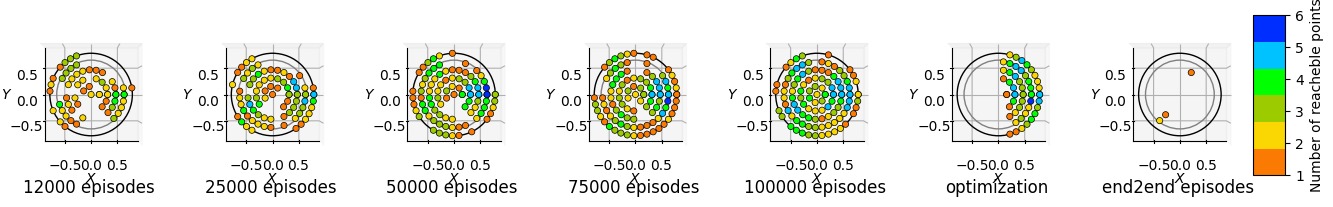

In [104]:
fig = plt.figure(figsize=plt.figaspect(1/len(tests)))
# fig = plt.figure(figsize=(10,10))

for i,test in enumerate(tests):
    if str(test).isnumeric():
        rb = joblib.load(
                f'../runs_256/test/model_{test}/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = rb.state[:n_episode][:, :3]
        target_points = rb.state[:n_episode][:, 3:]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance
    
    elif test == 'optim':
        target_points = np.array([target for target in optim['target_points'].values])
        perc_error = optim['error_log'].values.copy()

    elif test == 'end2end':
        rb = joblib.load(
                f'../runs_joints/test/model_10800000/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = np.full((n_episode,3),[-0.01303,  0.00229,  0.25252])
        target_points = rb.state[:n_episode][:, 9:12]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance

    perc_error*=100
    # Filter points with perc_error < err_treshold
    idx = perc_error <= err_treshold
    err_filter = perc_error[idx]
    feasible_region = target_points[idx, :]
    n_of_point = len(err_filter)    


    # generate surface
    xy_pair = []
    err = []

    for j,p in enumerate(feasible_region):
        # new point
        if [p[0],p[1]] not in xy_pair:
            xy_pair.append([p[0],p[1]])
            err.append([err_filter[j]])
        else:
            # x,y present, get if z > z in array
            idx = xy_pair.index([p[0],p[1]])
            err[idx].append(err_filter[j])

    nr_points = [len(e) for e in err]
    surface = np.append(np.array(xy_pair),np.array(nr_points).reshape(-1,1),axis=1)

    ax = fig.add_subplot(1, len(tests), i+1, projection='3d',computed_zorder=False)
    train_area = Circle( (0, 0),0.65, fill = False, color='gray')
    test_area = Circle( (0, 0),0.78, fill = False, color='black')
    ax.add_patch(test_area)
    ax.add_patch(train_area)
    art3d.pathpatch_2d_to_3d(train_area, z=0, zdir="z")
    art3d.pathpatch_2d_to_3d(test_area, z=0, zdir="z")
    ax.margins(x=0,y=0,z=0)
    ax.set_xlim(-.85, .85)
    ax.set_ylim(-.85, .85)
    # ax.set_zlim(0, 0.7)
    ax.zaxis.line.set_lw(0.)
    ax.set_zticks([])
    ax.view_init(azim=-90,elev=90)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    if test != 'optim':
        ax.set_title( f'{test} episodes', y=.0, pad=-15)
    else:
        ax.set_title( 'optimization', y=.0, pad=-15)

    # surf_plot = ax.plot_trisurf(surface[:, 0], surface[:, 1], surface[:, 2], alpha=1, edgecolors="black", linewidths=0.2, cmap=cmap, norm=norm)
    surf_plot = ax.scatter(surface[:, 0], surface[:, 1], 0, alpha=1, edgecolors="black", linewidths=0.5, c=surface[:, 2], cmap=n_map, norm=n_norm)

cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
fig.colorbar(surf_plot, shrink=0.3, label='Number of reacheble points', cax=cbar_ax)

# fig.suptitle('Mean RPE fo test target positions [RPE $\leq$ 0.1]')
fig.savefig(os.path.join('plots', f'numb_points_surface_plot.pdf'), dpi=500, bbox_inches='tight')
fig.show()

/tmp/ipykernel_861130/4086183450.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


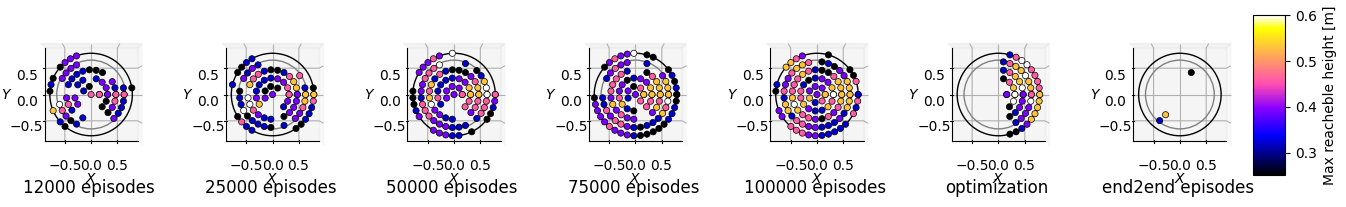

In [105]:
fig = plt.figure(figsize=plt.figaspect(1/len(tests)))
# fig = plt.figure(figsize=(10,10))

for i,test in enumerate(tests):
    if str(test).isnumeric():
        rb = joblib.load(
                f'../runs_256/test/model_{test}/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = rb.state[:n_episode][:, :3]
        target_points = rb.state[:n_episode][:, 3:]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance
    
    elif test == 'optim':
        target_points = np.array([target for target in optim['target_points'].values])
        perc_error = optim['error_log'].values.copy()

    elif test == 'end2end':
        rb = joblib.load(
                f'../runs_joints/test/model_10800000/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = np.full((n_episode,3),[-0.01303,  0.00229,  0.25252])
        target_points = rb.state[:n_episode][:, 9:12]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance
    
    perc_error*=100
    # Filter points with perc_error < err_treshold
    idx = perc_error <= err_treshold
    err_filter = perc_error[idx]
    feasible_region = target_points[idx, :]
    n_of_point = len(err_filter)  

    # generate surface
    xy_pair = []
    max_z = []

    for p in feasible_region:
        # new point
        if [p[0],p[1]] not in xy_pair:
            xy_pair.append([p[0],p[1]])
            max_z.append(p[2])
        else:
            # x,y present, get if z > z in array
            idx = xy_pair.index([p[0],p[1]])
            if p[2] > max_z[idx]:
                # new z value
                max_z[idx] = p[2]

    surface = np.append(np.array(xy_pair),np.array(max_z).reshape(-1,1),axis=1)

    ax = fig.add_subplot(1, len(tests), i+1, projection='3d',computed_zorder=False)
    train_area = Circle( (0, 0),0.65, fill = False, color='gray')
    test_area = Circle( (0, 0),0.78, fill = False, color='black')
    ax.add_patch(train_area)
    ax.add_patch(test_area)
    art3d.pathpatch_2d_to_3d(train_area, z=0, zdir="z")
    art3d.pathpatch_2d_to_3d(test_area, z=0, zdir="z")
    ax.margins(x=0,y=0,z=0)
    ax.set_xlim(-0.85, 0.85)
    ax.set_ylim(-0.85, 0.85)
    # ax.set_zlim(0, .7)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.zaxis.line.set_lw(0.)
    ax.set_zticks([])
    ax.view_init(azim=-90,elev=90)
    if test != 'optim':
        ax.set_title( f'{test} episodes', y=.0, pad=-15)
    else:
        ax.set_title( 'optimization', y=.0, pad=-15)
    # surf_plot = ax.plot_trisurf(surface[:, 0], surface[:, 1], surface[:, 2], alpha=1, edgecolors="black", linewidths=0.1, cmap=z_cmap, norm=z_norm)
    surf_plot = ax.scatter(surface[:, 0], surface[:, 1], 0, alpha=1, edgecolors="black", linewidths=0.5, c=surface[:, 2], cmap=z_cmap, norm=z_norm)
    
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
fig.colorbar(surf_plot, shrink=0.3 ,label='Max reacheble height [m]', cax=cbar_ax)

# fig.suptitle('Max heigt of filtered target positions [RPE $\leq$ 0.1]')
fig.savefig(os.path.join('plots', f'height_surface_plot.pdf'), dpi=500, bbox_inches='tight')
fig.show()

In [106]:
len(tests_error)

7

In [107]:
[i.shape for i in tests_error]

[(726,), (726,), (726,), (726,), (726,), (726,), (726,)]

In [108]:
tests_error = np.array(tests_error)
# tests_error = tests_error

Text(0.5, 9.444444444444438, 'Relative percentual error [%]')

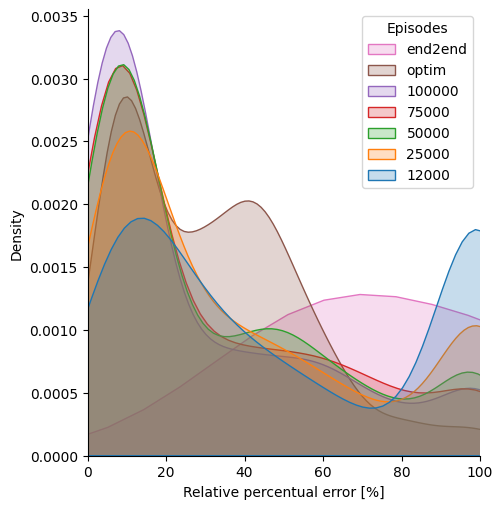

In [109]:
sns.displot([e for e in tests_error],kind='kde',fill=True,legend=False)
plt.legend(title="Episodes",labels=tests[::-1])
plt.xlim(0,100)
plt.savefig('err_dist.jpg',dpi=200)
plt.xlabel("Relative percentual error [%]")
# plt.savefig(os.path.join('plots', 'error_density.png'), dpi=500)

In [110]:
tests_error.shape

(7, 726)

In [111]:
tests_error_128 = []

In [112]:
for i,test in enumerate(tests):
    if str(test).isnumeric():
        rb = joblib.load(
                f'../runs_128/test/model_{test}/ReplayBuffer_test.joblib')

        n_episode = rb.mem_size
        com0_points = rb.state[:n_episode][:, :3]
        target_points = rb.state[:n_episode][:, 3:]
        reached_points = rb.next_state[:n_episode][:, :3]
        target_error = np.linalg.norm(target_points - reached_points, axis=1)
        target_distance = np.linalg.norm(target_points-com0_points, axis=1)
        perc_error = target_error/target_distance
        
        perc_error*=100
        tests_error_128.append(perc_error)
    
    elif test == 'optim':
        pass

    elif test == 'end2end':
        pass
        

In [113]:
tests_error_128 = np.array(tests_error_128)

In [114]:
target_points

array([[-7.77470700e-01,  6.27639236e-02,  2.50000000e-01],
       [-7.77470700e-01,  6.27639236e-02,  3.20000000e-01],
       [-7.77470700e-01,  6.27639236e-02,  3.90000000e-01],
       ...,
       [ 7.80000000e-01,  9.55224503e-17,  4.60000000e-01],
       [ 7.80000000e-01,  9.55224503e-17,  5.30000000e-01],
       [ 7.80000000e-01,  9.55224503e-17,  6.00000000e-01]])

In [115]:
back_index = (target_points[:,0] <= 0) & (np.linalg.norm(target_points[:,:2],axis=-1) <= 0.63) & (target_points[:,2] <= 0.53)

In [116]:
front_index = (target_points[:,0] >= 0) & (np.linalg.norm(target_points[:,:2],axis=-1) <= 0.63) & (target_points[:,2] <= 0.53)

In [117]:
back = target_points[back_index]
front = target_points[front_index]


/tmp/ipykernel_861130/95655428.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_861130/95655428.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


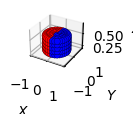

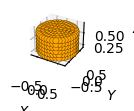

In [118]:
fig = plt.figure()
ax = fig.add_subplot(1, len(tests), i+1, projection='3d')
ax.margins(x=0,y=0,z=0)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0.2, .7)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
# ax.view_init(azim=-90,elev=90)
ax.scatter(back[:, 0], back[:, 1], back[:, 2], alpha=1, edgecolors="black", linewidths=0.2, color = 'red')
ax.scatter(front[:, 0], front[:, 1], front[:, 2], alpha=1, edgecolors="black", linewidths=0.2, color = 'blue')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(1, len(tests), i+1, projection='3d')
ax.margins(x=0,y=0,z=0)
ax.set_xlim(-.79, .79)
ax.set_ylim(-.79, .79)
ax.set_zlim(0.2, .7)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
# ax.view_init(azim=-90,elev=10)
ax.scatter(target_points[:, 0], target_points[:, 1], target_points[:, 2], alpha=1, edgecolors="black", linewidths=0.2, color = 'orange')
fig.show()

In [119]:
tests

[12000, 25000, 50000, 75000, 100000, 'optim', 'end2end']

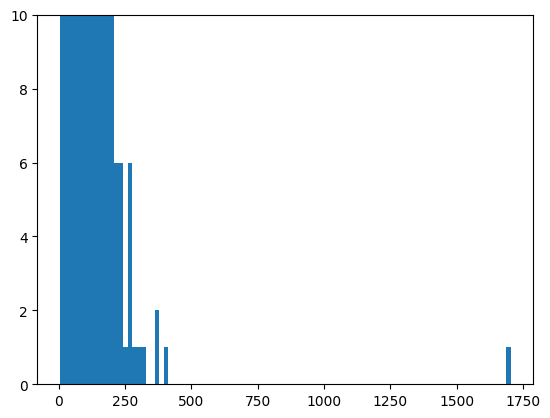

In [120]:
plt.hist(tests_error[-1], bins=100)
plt.ylim((0,10))
plt.show()

In [121]:
t_out = np.array([x if x <= 400 else 400 for x in tests_error[-1]])

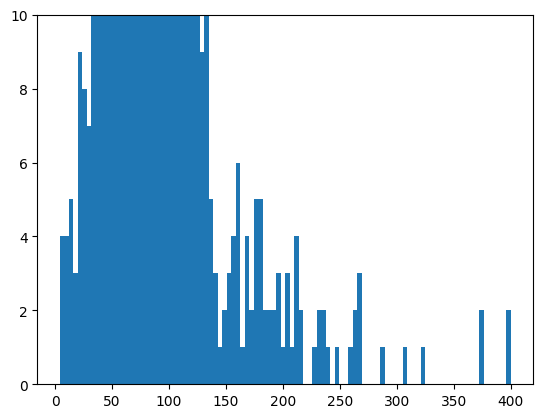

In [122]:
plt.hist(t_out, bins=100)
plt.ylim((0,10))
plt.show()

In [123]:
np.mean(t_out[back_index]), np.mean(t_out[front_index])

(102.68360449547517, 99.04460993686212)

back
256 [42.9185453  31.20910735 25.64341784 24.38313441 19.24797386]
128 [41.69650873 32.22611317 21.69210069 18.33417123 16.68141253]
optim 51.95412064905354
front
256 [42.97217467 27.41591604 20.65604513 18.74324708 16.98942965]
128 [45.98185403 28.07587749 28.20077546 18.83083947 18.90559994]
optim 16.452303900568154


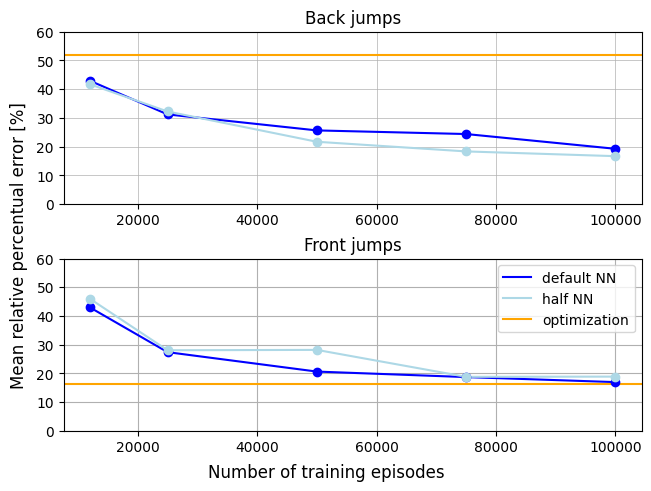

In [124]:
fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', sharey=True)

# back jump
ax1.set_ylim(0,60)
print('back')
net_256_b= np.mean(tests_error[:-2,back_index],axis=1)
net_128_b = np.mean(tests_error_128[:,back_index],axis=1)

print(256,net_256_b)
print(128,net_128_b)


ax1.plot(tests[:-2],net_256_b, color='blue', label="default NN")
ax1.plot(tests[:-2],net_128_b, color='lightblue', label="half NN")

ax1.scatter(tests[:-2],net_256_b, color='blue', zorder=2.5)
ax1.scatter(tests[:-2],net_128_b, color='lightblue', zorder=2.5)
ax1.grid(linewidth=0.5)


optim_b = np.mean(tests_error[-2,back_index])

print('optim',optim_b)

ax1.axhline(optim_b,color='orange',label='optimization')
ax1.set_title('Back jumps')

# front jump
ax2.set_ylim(0,60)

print('front')
net_256_f= np.mean(tests_error[:-2,front_index],axis=1)
net_128_f = np.mean(tests_error_128[:,front_index],axis=1)

print(256,net_256_f)
print(128,net_128_f)

ax2.plot(tests[:-2],net_256_f, color='blue', label="default NN")
ax2.plot(tests[:-2],net_128_f, color='lightblue', label="half NN")

ax2.scatter(tests[:-2],net_256_f, color='blue', zorder=2.5)
ax2.scatter(tests[:-2],net_128_f, color='lightblue', zorder=2.5)

optim_f = np.mean(tests_error[-2,front_index])

print('optim',optim_f)

ax2.axhline(optim_f,color='orange',label='optimization')
ax2.set_title('Front jumps')
ax2.legend()
ax2.grid()


fig.supxlabel('Number of training episodes')
fig.supylabel('Mean relative percentual error [%]')
plt.savefig(os.path.join('plots', 'jumps_avg_error.pdf'), dpi=500,  bbox_inches='tight')
plt.show()

In [125]:
optim['elapsed_time'].loc[back_index].mean()

16.992987482722214

In [126]:
optim['elapsed_time'].loc[front_index].mean()

7.58666999049303

In [127]:

# plt.plot(tests[:-1],np.mean(tests_error[:-1,:],axis=1), color='blue', label="default NN")
# plt.scatter(tests[:-1],np.mean(tests_error[:-1,:],axis=1), color='blue')

# plt.plot(tests[:-1],np.mean(tests_error_128,axis=1), color='lightblue', label="half NN")
# plt.scatter(tests[:-1],np.mean(tests_error_128,axis=1), color='lightblue')


# plt.axhline(np.mean(tests_error[-1,:]),color='orange',label='optimization')
# plt.xlabel('Number of episodes')
# plt.ylabel('Mean relative percentual error [%]')
# plt.legend()
# plt.savefig(os.path.join('plots', 'avg_error.png'), dpi=500,  bbox_inches='tight')
# plt.show()